In [43]:
import os
import sys
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [44]:
df_train = pd.read_csv(os.path.join("data", "train.csv"), index_col="Id")
df_test = pd.read_csv(os.path.join("data", "test.csv"), index_col="Id")
df = pd.concat([df_train, df_test])

In [45]:
df.shape

(581012, 55)

In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5.0
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5.0
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2.0
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2.0
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581012 entries, 1 to 581012
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  int64  
 1   Aspect                              581012 non-null  int64  
 2   Slope                               581012 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64  
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64  
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64  
 6   Hillshade_9am                       581012 non-null  int64  
 7   Hillshade_Noon                      581012 non-null  int64  
 8   Hillshade_3pm                       581012 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64  
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

Cały One-hot na boolean, ew int8. 

Pozostałe typy też odpowiednio zmniejszyć.

Wydaje się że nie ma żadnych braków.

In [9]:
my_report = sv.analyze(df_train)
my_report.show_html(filepath='train_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:04 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report = sv.compare([df_train, "Training Data"], [df_test, "Test Data"])
my_report.show_html(filepath="compare_report.html")

Typy gleby 7 i 15 nie występują w danych uczących, można je wywalić.

In [53]:
df.sample(4)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
27127,3152,167,8,134,20,6607,226,243,150,2016,...,0,0,0,0,0,0,0,0,0,NaN
225564,3035,195,5,616,125,2215,219,244,161,2717,...,1,0,0,0,0,0,0,0,0,NaN
197249,3088,151,11,85,12,4630,234,240,136,1207,...,0,0,0,0,0,0,0,0,0,NaN
145933,2651,84,17,240,16,1144,242,208,90,1071,...,0,0,0,0,0,0,0,0,0,NaN


In [49]:
df_no_soil = df[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Cover_Type']]

<Axes: >

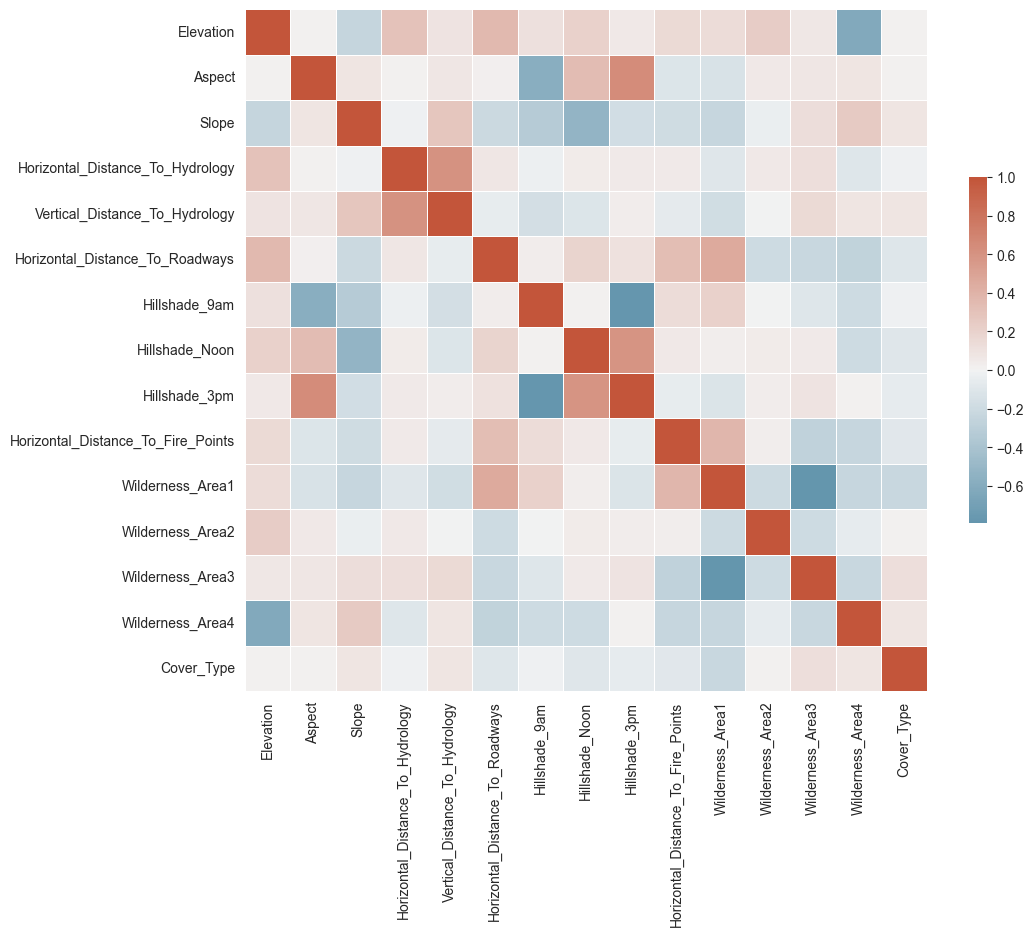

In [51]:
corr = df_no_soil.corr()

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, 
            cmap=cmap,
            center=0,
            vmax=1,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})